In [17]:
import pandas as pd
import re

#### Classificação de acordo com o artigo 23 da LAI.


I - pôr em risco a defesa e a soberania nacionais ou a integridade do território nacional;

II - prejudicar ou pôr em risco a condução de negociações ou as relações internacionais do País, ou as que tenham sido fornecidas em caráter sigiloso por outros Estados e organismos internacionais;

III - pôr em risco a vida, a segurança ou a saúde da população;

IV - oferecer elevado risco à estabilidade financeira, econômica ou monetária do País;

V - prejudicar ou causar risco a planos ou operações estratégicos das Forças Armadas;

VI - prejudicar ou causar risco a projetos de pesquisa e desenvolvimento científico ou tecnológico, assim como a sistemas, bens, instalações ou áreas de interesse estratégico nacional;

VII - pôr em risco a segurança de instituições ou de altas autoridades nacionais ou estrangeiras e seus familiares; ou

VIII - comprometer atividades de inteligência, bem como de investigação ou fiscalização em andamento, relacionadas com a prevenção ou repressão de infrações.



In [18]:
def classificar_prazo(prazo):
  if prazo == '05 anos' or prazo ==  '5 anos':
    return 'reservado'
  elif prazo == '15 anos':
    return 'secreto'
  elif prazo == '25 anos':
    return 'ultrassecreto'
  else:
    return None

def classificar_assunto(dispositivo):
  mapa_assuntos = {
      'I': 'Defesa e Soberania',
      'II': 'Relações Internacionais',
      'III': 'Saúde Pública',
      'IV': 'Estabilidade Financeira',
      'V': 'Forças Armadas',
      'VI': 'Pesquisa e Desenvolvimento',
      'VII': 'Segurança de Instituições e Autoridades',
      'VIII': 'Inteligência e Investigação',
  }
  return mapa_assuntos.get(dispositivo)

def clean_dispositivo(text):
  if isinstance(text, str):
    match = re.search(r'([IVX]+)', text)
    if match:
      return match.group(1)
  return None

def extrair_incisos_sql(texto):
    if isinstance(texto, str):
        match = re.search(r'Incisos?\s+([IVXLCDM]+(?:,\s*[IVXLCDM]+)*(?:\s+e\s+[IVXLCDM]+)?)', texto)
        if match:
            return match.group(1).replace(' e ', ', ').strip()
    return None

def split_and_explode(value):
  if isinstance(value, str):
    return value.split(',')
  return []

def classificar_categoria(dispositivo):
    mapa_categorias = {
        '1': 'Agricultura, extrativismo e pesca',
        '2': 'Ciência, Informação e Comunicação',
        '3': 'Comércio, Serviços e Turismo',
        '4': 'Cultura, Lazer e Esporte',
        '5': 'Defesa e Segurança',
        '6': 'Economia e Finanças',
        '7': 'Educação',
        '8': 'Governo e Política',
        '9': 'Habitação, Saneamento e Urbanismo',
        '10': 'Indústria',
        '11': 'Justiça e Legislação',
        '12': 'Meio ambiente',
        '13': 'Pessoa, família e sociedade',
        '14': 'Relações internacionais',
        '15': 'Saúde',
        '16': 'Trabalho',
        '17': 'Transportes e trânsito',
    }
    dispositivo_str = str(dispositivo)
    return mapa_categorias.get(dispositivo_str, 'Categoria desconhecida')


In [19]:
data_MJ = pd.read_csv('https://dados.mj.gov.br/dataset/657499ab-311e-41ba-a943-12af9a6dfe77/resource/464b2bce-100b-43fc-8f9d-febcc928f91a/download/informacoes-classificadas-2019.csv', encoding='latin-1', sep=';', skiprows=1, on_bad_lines='skip')
data_MJ2 = pd.read_csv('http://dados.mj.gov.br/dataset/657499ab-311e-41ba-a943-12af9a6dfe77/resource/99955de5-985b-4384-9186-bd4a7dcb280f/download/informacoes-classificadas-2020.csv', encoding='latin-1', sep=';', skiprows=1, on_bad_lines='skip')


combined_MJ_data = pd.concat([data_MJ, data_MJ2], ignore_index=True, join='inner')

combined_MJ_data['Grau de Sigilo'] = combined_MJ_data['Prazo de Classificação'].apply(classificar_prazo)

combined_MJ_data



,Nº Ord,Código de Indexação de Documento que contém Informação Classificada - CIDIC,Categoria¹,Dispositivo Legal²,Data de Produção,Data de Classificação,Prazo de Classificação,Validade da Classificação,Unidade Custodiante,Grau de Sigilo
0,1,08001.001468/2018-51.S.05.04/04/2018.03/04/2033.N,5,III,04/04/2018,19/04/2018,15 anos,03/04/2033,CPADS,secreto
1,2,08200.003733/2020-11.S.05.02/03/2020.04/03/2035.N,5,VIII,02/03/2020,04/03/2020,15 anos,04/03/2035,PF,secreto
2,3,08123.000415/2013-21.S.05.22/07/2008.21/07/2023.N,5,VIII,22/07/2008,29/01/2013,15 anos,22/07/2023,PF,secreto
3,4,08064.001653/2013-04.S.05.14/06/2012.13/06/2027.S,5,VIII,14/06/2012,14/06/2012,15 anos,14/06/2027,PF,secreto
4,5,08064.001651/2013-15.S.05.02/07/2012.01/07/2027.S,5,VIII,02/07/2012,02/07/2012,15 anos,02/07/2027,PF,secreto
...,...,...,...,...,...,...,...,...,...,...
4249,2090,08016.015058/2012-32.U.05.12/09/2012.11/09/2037.N,5,"III, VI, VIII",12/09/2012,12/04/2013,25 anos,12/09/2037,DEPEN,ultrassecreto
4250,2091,08016.015749/2012-36.U.05.27/09/2012.26/09/2037.N,5,"III, VI, VIII",27/09/2012,12/04/2013,25 anos,27/09/2037,DEPEN,ultrassecreto
4251,2092,08016.016544/2012-78.U.05.09/10/2012.08/10/2037.N,5,"III, VI, VIII",09/10/2012,12/04/2013,25 anos,09/10/2037,DEPEN,ultrassecreto
4252,2093,08016.016634/2012-69.U.05.09/10/2012.08/10/2037.N,5,"III, VI, VIII",09/10/2012,12/04/2013,25 anos,09/10/2037,DEPEN,ultrassecreto


In [20]:
combined_MJ_data.columns

Index(['Nº Ord',
       'Código de Indexação de Documento que contém Informação Classificada - CIDIC',
       'Categoria¹', 'Dispositivo Legal²', 'Data de Produção',
       'Data de Classificação', 'Prazo de Classificação',
       'Validade da Classificação', 'Unidade Custodiante', 'Grau de Sigilo'],
      dtype='object')

In [21]:
combined_MJ_data['Dispositivo Legal²'] = combined_MJ_data['Dispositivo Legal²'].apply(clean_dispositivo)

In [22]:
combined_MJ_data['Dispositivo Legal²'] = combined_MJ_data['Dispositivo Legal²'].str.split(',')
combined_MJ_data = combined_MJ_data.explode('Dispositivo Legal²')

In [23]:
combined_MJ_data

,Nº Ord,Código de Indexação de Documento que contém Informação Classificada - CIDIC,Categoria¹,Dispositivo Legal²,Data de Produção,Data de Classificação,Prazo de Classificação,Validade da Classificação,Unidade Custodiante,Grau de Sigilo
0,1,08001.001468/2018-51.S.05.04/04/2018.03/04/2033.N,5,III,04/04/2018,19/04/2018,15 anos,03/04/2033,CPADS,secreto
1,2,08200.003733/2020-11.S.05.02/03/2020.04/03/2035.N,5,VIII,02/03/2020,04/03/2020,15 anos,04/03/2035,PF,secreto
2,3,08123.000415/2013-21.S.05.22/07/2008.21/07/2023.N,5,VIII,22/07/2008,29/01/2013,15 anos,22/07/2023,PF,secreto
3,4,08064.001653/2013-04.S.05.14/06/2012.13/06/2027.S,5,VIII,14/06/2012,14/06/2012,15 anos,14/06/2027,PF,secreto
4,5,08064.001651/2013-15.S.05.02/07/2012.01/07/2027.S,5,VIII,02/07/2012,02/07/2012,15 anos,02/07/2027,PF,secreto
...,...,...,...,...,...,...,...,...,...,...
4249,2090,08016.015058/2012-32.U.05.12/09/2012.11/09/2037.N,5,III,12/09/2012,12/04/2013,25 anos,12/09/2037,DEPEN,ultrassecreto
4250,2091,08016.015749/2012-36.U.05.27/09/2012.26/09/2037.N,5,III,27/09/2012,12/04/2013,25 anos,27/09/2037,DEPEN,ultrassecreto
4251,2092,08016.016544/2012-78.U.05.09/10/2012.08/10/2037.N,5,III,09/10/2012,12/04/2013,25 anos,09/10/2037,DEPEN,ultrassecreto
4252,2093,08016.016634/2012-69.U.05.09/10/2012.08/10/2037.N,5,III,09/10/2012,12/04/2013,25 anos,09/10/2037,DEPEN,ultrassecreto


In [24]:
combined_MJ_data['Dispositivo Legal²'] = combined_MJ_data['Dispositivo Legal²'].apply(clean_dispositivo)


In [25]:
combined_MJ_data['Tipo de Assunto'] = combined_MJ_data['Dispositivo Legal²'].apply(classificar_assunto)

In [26]:
combined_MJ_data['Categoria¹'] = combined_MJ_data['Categoria¹'].astype(str)


combined_MJ_data['Categoria¹'] = combined_MJ_data['Categoria¹'].apply(classificar_categoria)


In [27]:
combined_MJ_data

,Nº Ord,Código de Indexação de Documento que contém Informação Classificada - CIDIC,Categoria¹,Dispositivo Legal²,Data de Produção,Data de Classificação,Prazo de Classificação,Validade da Classificação,Unidade Custodiante,Grau de Sigilo,Tipo de Assunto
0,1,08001.001468/2018-51.S.05.04/04/2018.03/04/2033.N,Defesa e Segurança,III,04/04/2018,19/04/2018,15 anos,03/04/2033,CPADS,secreto,Saúde Pública
1,2,08200.003733/2020-11.S.05.02/03/2020.04/03/2035.N,Defesa e Segurança,VIII,02/03/2020,04/03/2020,15 anos,04/03/2035,PF,secreto,Inteligência e Investigação
2,3,08123.000415/2013-21.S.05.22/07/2008.21/07/2023.N,Defesa e Segurança,VIII,22/07/2008,29/01/2013,15 anos,22/07/2023,PF,secreto,Inteligência e Investigação
3,4,08064.001653/2013-04.S.05.14/06/2012.13/06/2027.S,Defesa e Segurança,VIII,14/06/2012,14/06/2012,15 anos,14/06/2027,PF,secreto,Inteligência e Investigação
4,5,08064.001651/2013-15.S.05.02/07/2012.01/07/2027.S,Defesa e Segurança,VIII,02/07/2012,02/07/2012,15 anos,02/07/2027,PF,secreto,Inteligência e Investigação
...,...,...,...,...,...,...,...,...,...,...,...
4249,2090,08016.015058/2012-32.U.05.12/09/2012.11/09/2037.N,Defesa e Segurança,III,12/09/2012,12/04/2013,25 anos,12/09/2037,DEPEN,ultrassecreto,Saúde Pública
4250,2091,08016.015749/2012-36.U.05.27/09/2012.26/09/2037.N,Defesa e Segurança,III,27/09/2012,12/04/2013,25 anos,27/09/2037,DEPEN,ultrassecreto,Saúde Pública
4251,2092,08016.016544/2012-78.U.05.09/10/2012.08/10/2037.N,Defesa e Segurança,III,09/10/2012,12/04/2013,25 anos,09/10/2037,DEPEN,ultrassecreto,Saúde Pública
4252,2093,08016.016634/2012-69.U.05.09/10/2012.08/10/2037.N,Defesa e Segurança,III,09/10/2012,12/04/2013,25 anos,09/10/2037,DEPEN,ultrassecreto,Saúde Pública


ministério da saúde

In [28]:
!pip install openpyxl

In [29]:
%pip install openpyxl

MS_data2021 = pd.read_excel("https://www.gov.br/saude/pt-br/acesso-a-informacao/informacoes-classificadas/rol-de-informacoes-classificadas/rol-de-informacoes-classificadas-ms-2021.xlsx/@@download/file", skiprows=2, header=0)

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [30]:
MS_data2021

,Unnamed: 0,CIDIC,CATEGORIA (15),GRAU SIGILO,DISPOSITIVO LEGAL,DATA DA PRODUÇÃO,DATA DA CLASSIFICAÇÃO,PRAZO DA CLASSIFICAÇÃO,ASSUNTO
0,1,250007.25000.131860/2012-67.S.15.12/11/2012.12...,SAUDE,SECRETO,"Inciso VI, art. 23, Lei n. 12527/2011",2012-11-12,2012-11-12,2027-11-12,Processo Administrativo contendo Termo de Comp...
1,2,250007.25000.049824/2011-70.S.15.19/05/2011.19...,SAUDE,SECRETO,"Inciso VI, art. 23, Lei n. 12527/2011",2011-05-19,2011-05-19,2026-05-19,Processo Administrativo contendo Termo de Comp...
2,3,250007.25000.191535/2012-53.S.15.12/11/2012.12...,SAUDE,SECRETO,"Inciso VI, art. 23, Lei n. 12527/2011",2012-11-12,2012-11-12,2027-11-12,Processo Administrativo contendo Termo de Comp...
3,4,250007.25000.191511/2012-02.S.15.12/11/2012.12...,SAUDE,SECRETO,"Inciso VI, art. 23, Lei n. 12527/2011",2012-11-12,2012-11-12,2027-11-12,Processo Administrativo contendo Termo de Comp...
4,5,250007.25000.136099/2012-50.S.15.12/11/2012.12...,SAUDE,SECRETO,"Inciso VI, art. 23, Lei n. 12527/2011",2012-11-12,2012-11-12,2027-11-12,Processo Administrativo contendo Termo de Comp...
...,...,...,...,...,...,...,...,...,...
153,154,250007.25000095575/2018-61.R.15.02/01/2018.01/...,SAUDE,RESERVADO,"Incisos III, IV e VII do artigo 23 da lei 12.527.",2018-01-02,2018-06-01,2023-06-01,Controle de Estoque de Insumos Estratégicos pa...
154,155,250007.25000095620/2018-87.R.15.02/01/2018.01/...,SAUDE,RESERVADO,"Incisos III, IV e VII do artigo 23 da lei 12.527.",2018-01-02,2018-06-01,2023-06-01,Plano de Demandas de Insumos Estratégicos para...
155,156,25000.142407/2020-96.R.15.08/10/2020.08/10/2025.N,SAUDE,RESERVADO,"Inciso III, VI e VIII - Art. 23 da lei 12527",2020-10-08,2020-12-11,2025-10-08,Plano Nacional de Imunização para CORONAVIRUS
156,157,25000169275/2022-40.R.15.02/10/2022.02/10/2025.N,SAUDE,RESERVADO,"Inciso III, §1º - Art. 24 da lei 12527",2020-10-02,2020-10-02,2025-10-02,Análise preparatória acerca de aquisição de in...


In [31]:
MS_data2021['DISPOSITIVO LEGAL'] = MS_data2021['DISPOSITIVO LEGAL'].apply(extrair_incisos_sql)


In [32]:
MS_data2021

,Unnamed: 0,CIDIC,CATEGORIA (15),GRAU SIGILO,DISPOSITIVO LEGAL,DATA DA PRODUÇÃO,DATA DA CLASSIFICAÇÃO,PRAZO DA CLASSIFICAÇÃO,ASSUNTO
0,1,250007.25000.131860/2012-67.S.15.12/11/2012.12...,SAUDE,SECRETO,VI,2012-11-12,2012-11-12,2027-11-12,Processo Administrativo contendo Termo de Comp...
1,2,250007.25000.049824/2011-70.S.15.19/05/2011.19...,SAUDE,SECRETO,VI,2011-05-19,2011-05-19,2026-05-19,Processo Administrativo contendo Termo de Comp...
2,3,250007.25000.191535/2012-53.S.15.12/11/2012.12...,SAUDE,SECRETO,VI,2012-11-12,2012-11-12,2027-11-12,Processo Administrativo contendo Termo de Comp...
3,4,250007.25000.191511/2012-02.S.15.12/11/2012.12...,SAUDE,SECRETO,VI,2012-11-12,2012-11-12,2027-11-12,Processo Administrativo contendo Termo de Comp...
4,5,250007.25000.136099/2012-50.S.15.12/11/2012.12...,SAUDE,SECRETO,VI,2012-11-12,2012-11-12,2027-11-12,Processo Administrativo contendo Termo de Comp...
...,...,...,...,...,...,...,...,...,...
153,154,250007.25000095575/2018-61.R.15.02/01/2018.01/...,SAUDE,RESERVADO,"III, IV, VII",2018-01-02,2018-06-01,2023-06-01,Controle de Estoque de Insumos Estratégicos pa...
154,155,250007.25000095620/2018-87.R.15.02/01/2018.01/...,SAUDE,RESERVADO,"III, IV, VII",2018-01-02,2018-06-01,2023-06-01,Plano de Demandas de Insumos Estratégicos para...
155,156,25000.142407/2020-96.R.15.08/10/2020.08/10/2025.N,SAUDE,RESERVADO,"III, VI, VIII",2020-10-08,2020-12-11,2025-10-08,Plano Nacional de Imunização para CORONAVIRUS
156,157,25000169275/2022-40.R.15.02/10/2022.02/10/2025.N,SAUDE,RESERVADO,III,2020-10-02,2020-10-02,2025-10-02,Análise preparatória acerca de aquisição de in...


In [33]:
MS_data2021['DISPOSITIVO LEGAL'] = MS_data2021['DISPOSITIVO LEGAL'].apply(split_and_explode)
MS_data2021 = MS_data2021.explode('DISPOSITIVO LEGAL')
MS_data2021['DISPOSITIVO LEGAL'] = MS_data2021['DISPOSITIVO LEGAL'].str.strip()

In [34]:
MS_data2021

,Unnamed: 0,CIDIC,CATEGORIA (15),GRAU SIGILO,DISPOSITIVO LEGAL,DATA DA PRODUÇÃO,DATA DA CLASSIFICAÇÃO,PRAZO DA CLASSIFICAÇÃO,ASSUNTO
0,1,250007.25000.131860/2012-67.S.15.12/11/2012.12...,SAUDE,SECRETO,VI,2012-11-12,2012-11-12,2027-11-12,Processo Administrativo contendo Termo de Comp...
1,2,250007.25000.049824/2011-70.S.15.19/05/2011.19...,SAUDE,SECRETO,VI,2011-05-19,2011-05-19,2026-05-19,Processo Administrativo contendo Termo de Comp...
2,3,250007.25000.191535/2012-53.S.15.12/11/2012.12...,SAUDE,SECRETO,VI,2012-11-12,2012-11-12,2027-11-12,Processo Administrativo contendo Termo de Comp...
3,4,250007.25000.191511/2012-02.S.15.12/11/2012.12...,SAUDE,SECRETO,VI,2012-11-12,2012-11-12,2027-11-12,Processo Administrativo contendo Termo de Comp...
4,5,250007.25000.136099/2012-50.S.15.12/11/2012.12...,SAUDE,SECRETO,VI,2012-11-12,2012-11-12,2027-11-12,Processo Administrativo contendo Termo de Comp...
...,...,...,...,...,...,...,...,...,...
155,156,25000.142407/2020-96.R.15.08/10/2020.08/10/2025.N,SAUDE,RESERVADO,III,2020-10-08,2020-12-11,2025-10-08,Plano Nacional de Imunização para CORONAVIRUS
155,156,25000.142407/2020-96.R.15.08/10/2020.08/10/2025.N,SAUDE,RESERVADO,VI,2020-10-08,2020-12-11,2025-10-08,Plano Nacional de Imunização para CORONAVIRUS
155,156,25000.142407/2020-96.R.15.08/10/2020.08/10/2025.N,SAUDE,RESERVADO,VIII,2020-10-08,2020-12-11,2025-10-08,Plano Nacional de Imunização para CORONAVIRUS
156,157,25000169275/2022-40.R.15.02/10/2022.02/10/2025.N,SAUDE,RESERVADO,III,2020-10-02,2020-10-02,2025-10-02,Análise preparatória acerca de aquisição de in...


In [35]:
MS_data2021['DISPOSITIVO LEGAL'] = MS_data2021['DISPOSITIVO LEGAL'].apply(clean_dispositivo)

In [36]:
MS_data2021['TIPO DE ASSUNTO'] = MS_data2021['DISPOSITIVO LEGAL'].apply(classificar_assunto)

In [37]:
MS_data2021 = MS_data2021.rename(columns={'GRAU SIGILO': 'Grau de sigilo'})

In [38]:
MS_data2021['Grau de sigilo'] = MS_data2021['Grau de sigilo'].str.lower()

In [39]:
MS_data2021

,Unnamed: 0,CIDIC,CATEGORIA (15),Grau de sigilo,DISPOSITIVO LEGAL,DATA DA PRODUÇÃO,DATA DA CLASSIFICAÇÃO,PRAZO DA CLASSIFICAÇÃO,ASSUNTO,TIPO DE ASSUNTO
0,1,250007.25000.131860/2012-67.S.15.12/11/2012.12...,SAUDE,secreto,VI,2012-11-12,2012-11-12,2027-11-12,Processo Administrativo contendo Termo de Comp...,Pesquisa e Desenvolvimento
1,2,250007.25000.049824/2011-70.S.15.19/05/2011.19...,SAUDE,secreto,VI,2011-05-19,2011-05-19,2026-05-19,Processo Administrativo contendo Termo de Comp...,Pesquisa e Desenvolvimento
2,3,250007.25000.191535/2012-53.S.15.12/11/2012.12...,SAUDE,secreto,VI,2012-11-12,2012-11-12,2027-11-12,Processo Administrativo contendo Termo de Comp...,Pesquisa e Desenvolvimento
3,4,250007.25000.191511/2012-02.S.15.12/11/2012.12...,SAUDE,secreto,VI,2012-11-12,2012-11-12,2027-11-12,Processo Administrativo contendo Termo de Comp...,Pesquisa e Desenvolvimento
4,5,250007.25000.136099/2012-50.S.15.12/11/2012.12...,SAUDE,secreto,VI,2012-11-12,2012-11-12,2027-11-12,Processo Administrativo contendo Termo de Comp...,Pesquisa e Desenvolvimento
...,...,...,...,...,...,...,...,...,...,...
155,156,25000.142407/2020-96.R.15.08/10/2020.08/10/2025.N,SAUDE,reservado,III,2020-10-08,2020-12-11,2025-10-08,Plano Nacional de Imunização para CORONAVIRUS,Saúde Pública
155,156,25000.142407/2020-96.R.15.08/10/2020.08/10/2025.N,SAUDE,reservado,VI,2020-10-08,2020-12-11,2025-10-08,Plano Nacional de Imunização para CORONAVIRUS,Pesquisa e Desenvolvimento
155,156,25000.142407/2020-96.R.15.08/10/2020.08/10/2025.N,SAUDE,reservado,VIII,2020-10-08,2020-12-11,2025-10-08,Plano Nacional de Imunização para CORONAVIRUS,Inteligência e Investigação
156,157,25000169275/2022-40.R.15.02/10/2022.02/10/2025.N,SAUDE,reservado,III,2020-10-02,2020-10-02,2025-10-02,Análise preparatória acerca de aquisição de in...,Saúde Pública


In [40]:
mf_data = pd.read_excel("https://www.gov.br/fazenda/pt-br/acesso-a-informacao/informacoes-classificadas/rol_de_informacoes_classificadas_e_desclassificadas_2023_24_mf.xlsx", skiprows=5, header=0)

mf_data

,NUP,Grau de Sigilo,Categoria (VCGE),Data de Produção,Data de Classificação,Prazo de Restrição de Acesso,Data da Desclassificação,Indicação de Reclassificação,Fundamentação Legal para Classificação,Assunto do Documento\n(breve resumo),Órgão,CIDIC
0,10167.720001/2022-49,Reservado,06 - Economia e Finanças,2021-04-27 00:00:00,2022-04-13 00:00:00,5 anos,2026-04-27 00:00:00,Não,"Art. 23, inciso VIII da Lei 12527/2011",Auditoria,RFB,10167.720001/2022-49.R.06.27.04/2021.27/04/2026.N
1,10265.044038/2020-99,Reservado,06 - Economia e Finanças,2020-10-01 00:00:00,2022-10-10 00:00:00,5 anos,2025-01-01 00:00:00,Não,"Art. 23, inciso VIII da Lei 12527/2011",Planejamento,RFB,10265.044038/2020-99.R.06.01/01/2020.01/01/2025.N
2,10265.094663/2020-81,Reservado,06 - Economia e Finanças,2020-03-01 00:00:00,2022-10-10 00:00:00,5 anos,2025-03-01 00:00:00,Não,"Art. 23, inciso VIII da Lei 12527/2011",Planejamento,RFB,10265.094663/2020-81.R.06.01/03/2020.01/03/2025.N
3,10265.248279/2022-77,Reservado,06 - Economia e Finanças,2021-10-01 00:00:00,2022-10-10 00:00:00,5 anos,2026-10-01 00:00:00,Não,"Art. 23, inciso VIII da Lei 12527/2011",Planejamento,RFB,10265.248279/2022-77.R.06.01/10/2021.01/10/2026.N
4,13031.172164/2023-17,Reservado,06 - Economia e Finanças,2023-06-26 00:00:00,2023-06-26 00:00:00,5 anos,2028-06-26 00:00:00,Não,"Art. 23, inciso VIII da Lei 12527/2011",Gestão do Crédito Tributário e do Direito Cred...,RFB,13031.172164/2023-17.R.06.26/06/2023.26/06/2028.N
...,...,...,...,...,...,...,...,...,...,...,...,...
182,12177.100256/2020-35,Reservado,06 - Economia e Finanças,2020-07-01 00:00:00,2020-08-28 00:00:00,5 anos,2025-06-30 00:00:00,Não,"Artigo 25, inciso V, do Decreto nº 7.724, de 1...",Cálculos (10163787 e 10169912) e modelos (1016...,SPE,12177.100256/2020-35.R.06.01/07/2020.30/06/2025.N
183,12177.100267.2019-81,Reservado,06 - Economia e Finanças,2019-06-27 00:00:00,2019-06-27 00:00:00,5 anos,2024-06-27 00:00:00,Não,"Lei 12.527/2011, Art. 23, IV.",Nota Técnica,SPE,12177.100267.2019-81.R.06.27/06/2019.27/06/2024.N
184,12177.100273/2020-72,Reservado,06 - Economia e Finanças,2020-07-31 00:00:00,2020-09-11 00:00:00,5 anos,2025-09-10 00:00:00,Não,"Artigo 25, inciso V, do Decreto nº 7.724, de 1...","Nota Técnica ""Impactos Iniciais da Introdução ...",SPE,12177.100273/2020-72.R.06.31/07/2020.10/09/2025.N
185,12177.100291/2020-54,Reservado,06 - Economia e Finanças,2020-09-28 00:00:00,2021-04-08 00:00:00,5 anos,2025-09-29 00:00:00,Não,"Artigo 25, inciso V, do Decreto nº 7.724, de 1...","Nota Técnica ""Impactos redistributivos da CBS:...",SPE,12177.100291/2020-54.R.06.28.09.2020.29.09.2025.N


In [41]:
mf_data['Fundamentação Legal para Classificação'] = mf_data['Fundamentação Legal para Classificação'].apply(clean_dispositivo)

In [42]:
mf_data

,NUP,Grau de Sigilo,Categoria (VCGE),Data de Produção,Data de Classificação,Prazo de Restrição de Acesso,Data da Desclassificação,Indicação de Reclassificação,Fundamentação Legal para Classificação,Assunto do Documento\n(breve resumo),Órgão,CIDIC
0,10167.720001/2022-49,Reservado,06 - Economia e Finanças,2021-04-27 00:00:00,2022-04-13 00:00:00,5 anos,2026-04-27 00:00:00,Não,VIII,Auditoria,RFB,10167.720001/2022-49.R.06.27.04/2021.27/04/2026.N
1,10265.044038/2020-99,Reservado,06 - Economia e Finanças,2020-10-01 00:00:00,2022-10-10 00:00:00,5 anos,2025-01-01 00:00:00,Não,VIII,Planejamento,RFB,10265.044038/2020-99.R.06.01/01/2020.01/01/2025.N
2,10265.094663/2020-81,Reservado,06 - Economia e Finanças,2020-03-01 00:00:00,2022-10-10 00:00:00,5 anos,2025-03-01 00:00:00,Não,VIII,Planejamento,RFB,10265.094663/2020-81.R.06.01/03/2020.01/03/2025.N
3,10265.248279/2022-77,Reservado,06 - Economia e Finanças,2021-10-01 00:00:00,2022-10-10 00:00:00,5 anos,2026-10-01 00:00:00,Não,VIII,Planejamento,RFB,10265.248279/2022-77.R.06.01/10/2021.01/10/2026.N
4,13031.172164/2023-17,Reservado,06 - Economia e Finanças,2023-06-26 00:00:00,2023-06-26 00:00:00,5 anos,2028-06-26 00:00:00,Não,VIII,Gestão do Crédito Tributário e do Direito Cred...,RFB,13031.172164/2023-17.R.06.26/06/2023.26/06/2028.N
...,...,...,...,...,...,...,...,...,...,...,...,...
182,12177.100256/2020-35,Reservado,06 - Economia e Finanças,2020-07-01 00:00:00,2020-08-28 00:00:00,5 anos,2025-06-30 00:00:00,Não,V,Cálculos (10163787 e 10169912) e modelos (1016...,SPE,12177.100256/2020-35.R.06.01/07/2020.30/06/2025.N
183,12177.100267.2019-81,Reservado,06 - Economia e Finanças,2019-06-27 00:00:00,2019-06-27 00:00:00,5 anos,2024-06-27 00:00:00,Não,IV,Nota Técnica,SPE,12177.100267.2019-81.R.06.27/06/2019.27/06/2024.N
184,12177.100273/2020-72,Reservado,06 - Economia e Finanças,2020-07-31 00:00:00,2020-09-11 00:00:00,5 anos,2025-09-10 00:00:00,Não,V,"Nota Técnica ""Impactos Iniciais da Introdução ...",SPE,12177.100273/2020-72.R.06.31/07/2020.10/09/2025.N
185,12177.100291/2020-54,Reservado,06 - Economia e Finanças,2020-09-28 00:00:00,2021-04-08 00:00:00,5 anos,2025-09-29 00:00:00,Não,V,"Nota Técnica ""Impactos redistributivos da CBS:...",SPE,12177.100291/2020-54.R.06.28.09.2020.29.09.2025.N


In [43]:
mf_data = mf_data.rename(columns={'Fundamentação Legal para Classificação': 'DISPOSITIVO LEGAL'})


In [44]:
mf_data

,NUP,Grau de Sigilo,Categoria (VCGE),Data de Produção,Data de Classificação,Prazo de Restrição de Acesso,Data da Desclassificação,Indicação de Reclassificação,DISPOSITIVO LEGAL,Assunto do Documento\n(breve resumo),Órgão,CIDIC
0,10167.720001/2022-49,Reservado,06 - Economia e Finanças,2021-04-27 00:00:00,2022-04-13 00:00:00,5 anos,2026-04-27 00:00:00,Não,VIII,Auditoria,RFB,10167.720001/2022-49.R.06.27.04/2021.27/04/2026.N
1,10265.044038/2020-99,Reservado,06 - Economia e Finanças,2020-10-01 00:00:00,2022-10-10 00:00:00,5 anos,2025-01-01 00:00:00,Não,VIII,Planejamento,RFB,10265.044038/2020-99.R.06.01/01/2020.01/01/2025.N
2,10265.094663/2020-81,Reservado,06 - Economia e Finanças,2020-03-01 00:00:00,2022-10-10 00:00:00,5 anos,2025-03-01 00:00:00,Não,VIII,Planejamento,RFB,10265.094663/2020-81.R.06.01/03/2020.01/03/2025.N
3,10265.248279/2022-77,Reservado,06 - Economia e Finanças,2021-10-01 00:00:00,2022-10-10 00:00:00,5 anos,2026-10-01 00:00:00,Não,VIII,Planejamento,RFB,10265.248279/2022-77.R.06.01/10/2021.01/10/2026.N
4,13031.172164/2023-17,Reservado,06 - Economia e Finanças,2023-06-26 00:00:00,2023-06-26 00:00:00,5 anos,2028-06-26 00:00:00,Não,VIII,Gestão do Crédito Tributário e do Direito Cred...,RFB,13031.172164/2023-17.R.06.26/06/2023.26/06/2028.N
...,...,...,...,...,...,...,...,...,...,...,...,...
182,12177.100256/2020-35,Reservado,06 - Economia e Finanças,2020-07-01 00:00:00,2020-08-28 00:00:00,5 anos,2025-06-30 00:00:00,Não,V,Cálculos (10163787 e 10169912) e modelos (1016...,SPE,12177.100256/2020-35.R.06.01/07/2020.30/06/2025.N
183,12177.100267.2019-81,Reservado,06 - Economia e Finanças,2019-06-27 00:00:00,2019-06-27 00:00:00,5 anos,2024-06-27 00:00:00,Não,IV,Nota Técnica,SPE,12177.100267.2019-81.R.06.27/06/2019.27/06/2024.N
184,12177.100273/2020-72,Reservado,06 - Economia e Finanças,2020-07-31 00:00:00,2020-09-11 00:00:00,5 anos,2025-09-10 00:00:00,Não,V,"Nota Técnica ""Impactos Iniciais da Introdução ...",SPE,12177.100273/2020-72.R.06.31/07/2020.10/09/2025.N
185,12177.100291/2020-54,Reservado,06 - Economia e Finanças,2020-09-28 00:00:00,2021-04-08 00:00:00,5 anos,2025-09-29 00:00:00,Não,V,"Nota Técnica ""Impactos redistributivos da CBS:...",SPE,12177.100291/2020-54.R.06.28.09.2020.29.09.2025.N


In [45]:
mf_data['Tipo de Assunto'] = mf_data['DISPOSITIVO LEGAL'].apply(classificar_assunto)

In [46]:
mf_data

,NUP,Grau de Sigilo,Categoria (VCGE),Data de Produção,Data de Classificação,Prazo de Restrição de Acesso,Data da Desclassificação,Indicação de Reclassificação,DISPOSITIVO LEGAL,Assunto do Documento\n(breve resumo),Órgão,CIDIC,Tipo de Assunto
0,10167.720001/2022-49,Reservado,06 - Economia e Finanças,2021-04-27 00:00:00,2022-04-13 00:00:00,5 anos,2026-04-27 00:00:00,Não,VIII,Auditoria,RFB,10167.720001/2022-49.R.06.27.04/2021.27/04/2026.N,Inteligência e Investigação
1,10265.044038/2020-99,Reservado,06 - Economia e Finanças,2020-10-01 00:00:00,2022-10-10 00:00:00,5 anos,2025-01-01 00:00:00,Não,VIII,Planejamento,RFB,10265.044038/2020-99.R.06.01/01/2020.01/01/2025.N,Inteligência e Investigação
2,10265.094663/2020-81,Reservado,06 - Economia e Finanças,2020-03-01 00:00:00,2022-10-10 00:00:00,5 anos,2025-03-01 00:00:00,Não,VIII,Planejamento,RFB,10265.094663/2020-81.R.06.01/03/2020.01/03/2025.N,Inteligência e Investigação
3,10265.248279/2022-77,Reservado,06 - Economia e Finanças,2021-10-01 00:00:00,2022-10-10 00:00:00,5 anos,2026-10-01 00:00:00,Não,VIII,Planejamento,RFB,10265.248279/2022-77.R.06.01/10/2021.01/10/2026.N,Inteligência e Investigação
4,13031.172164/2023-17,Reservado,06 - Economia e Finanças,2023-06-26 00:00:00,2023-06-26 00:00:00,5 anos,2028-06-26 00:00:00,Não,VIII,Gestão do Crédito Tributário e do Direito Cred...,RFB,13031.172164/2023-17.R.06.26/06/2023.26/06/2028.N,Inteligência e Investigação
...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,12177.100256/2020-35,Reservado,06 - Economia e Finanças,2020-07-01 00:00:00,2020-08-28 00:00:00,5 anos,2025-06-30 00:00:00,Não,V,Cálculos (10163787 e 10169912) e modelos (1016...,SPE,12177.100256/2020-35.R.06.01/07/2020.30/06/2025.N,Forças Armadas
183,12177.100267.2019-81,Reservado,06 - Economia e Finanças,2019-06-27 00:00:00,2019-06-27 00:00:00,5 anos,2024-06-27 00:00:00,Não,IV,Nota Técnica,SPE,12177.100267.2019-81.R.06.27/06/2019.27/06/2024.N,Estabilidade Financeira
184,12177.100273/2020-72,Reservado,06 - Economia e Finanças,2020-07-31 00:00:00,2020-09-11 00:00:00,5 anos,2025-09-10 00:00:00,Não,V,"Nota Técnica ""Impactos Iniciais da Introdução ...",SPE,12177.100273/2020-72.R.06.31/07/2020.10/09/2025.N,Forças Armadas
185,12177.100291/2020-54,Reservado,06 - Economia e Finanças,2020-09-28 00:00:00,2021-04-08 00:00:00,5 anos,2025-09-29 00:00:00,Não,V,"Nota Técnica ""Impactos redistributivos da CBS:...",SPE,12177.100291/2020-54.R.06.28.09.2020.29.09.2025.N,Forças Armadas


In [47]:
combined_MJ_data

,Nº Ord,Código de Indexação de Documento que contém Informação Classificada - CIDIC,Categoria¹,Dispositivo Legal²,Data de Produção,Data de Classificação,Prazo de Classificação,Validade da Classificação,Unidade Custodiante,Grau de Sigilo,Tipo de Assunto
0,1,08001.001468/2018-51.S.05.04/04/2018.03/04/2033.N,Defesa e Segurança,III,04/04/2018,19/04/2018,15 anos,03/04/2033,CPADS,secreto,Saúde Pública
1,2,08200.003733/2020-11.S.05.02/03/2020.04/03/2035.N,Defesa e Segurança,VIII,02/03/2020,04/03/2020,15 anos,04/03/2035,PF,secreto,Inteligência e Investigação
2,3,08123.000415/2013-21.S.05.22/07/2008.21/07/2023.N,Defesa e Segurança,VIII,22/07/2008,29/01/2013,15 anos,22/07/2023,PF,secreto,Inteligência e Investigação
3,4,08064.001653/2013-04.S.05.14/06/2012.13/06/2027.S,Defesa e Segurança,VIII,14/06/2012,14/06/2012,15 anos,14/06/2027,PF,secreto,Inteligência e Investigação
4,5,08064.001651/2013-15.S.05.02/07/2012.01/07/2027.S,Defesa e Segurança,VIII,02/07/2012,02/07/2012,15 anos,02/07/2027,PF,secreto,Inteligência e Investigação
...,...,...,...,...,...,...,...,...,...,...,...
4249,2090,08016.015058/2012-32.U.05.12/09/2012.11/09/2037.N,Defesa e Segurança,III,12/09/2012,12/04/2013,25 anos,12/09/2037,DEPEN,ultrassecreto,Saúde Pública
4250,2091,08016.015749/2012-36.U.05.27/09/2012.26/09/2037.N,Defesa e Segurança,III,27/09/2012,12/04/2013,25 anos,27/09/2037,DEPEN,ultrassecreto,Saúde Pública
4251,2092,08016.016544/2012-78.U.05.09/10/2012.08/10/2037.N,Defesa e Segurança,III,09/10/2012,12/04/2013,25 anos,09/10/2037,DEPEN,ultrassecreto,Saúde Pública
4252,2093,08016.016634/2012-69.U.05.09/10/2012.08/10/2037.N,Defesa e Segurança,III,09/10/2012,12/04/2013,25 anos,09/10/2037,DEPEN,ultrassecreto,Saúde Pública


In [48]:
colunas_interesse = ['Categoria¹', 'Dispositivo Legal²', 'Grau de Sigilo', 'Tipo de Assunto']
mj_data_final = combined_MJ_data[colunas_interesse]

In [49]:
mj_data_final

,Categoria¹,Dispositivo Legal²,Grau de Sigilo,Tipo de Assunto
0,Defesa e Segurança,III,secreto,Saúde Pública
1,Defesa e Segurança,VIII,secreto,Inteligência e Investigação
2,Defesa e Segurança,VIII,secreto,Inteligência e Investigação
3,Defesa e Segurança,VIII,secreto,Inteligência e Investigação
4,Defesa e Segurança,VIII,secreto,Inteligência e Investigação
...,...,...,...,...
4249,Defesa e Segurança,III,ultrassecreto,Saúde Pública
4250,Defesa e Segurança,III,ultrassecreto,Saúde Pública
4251,Defesa e Segurança,III,ultrassecreto,Saúde Pública
4252,Defesa e Segurança,III,ultrassecreto,Saúde Pública


In [50]:
MS_data2021

,Unnamed: 0,CIDIC,CATEGORIA (15),Grau de sigilo,DISPOSITIVO LEGAL,DATA DA PRODUÇÃO,DATA DA CLASSIFICAÇÃO,PRAZO DA CLASSIFICAÇÃO,ASSUNTO,TIPO DE ASSUNTO
0,1,250007.25000.131860/2012-67.S.15.12/11/2012.12...,SAUDE,secreto,VI,2012-11-12,2012-11-12,2027-11-12,Processo Administrativo contendo Termo de Comp...,Pesquisa e Desenvolvimento
1,2,250007.25000.049824/2011-70.S.15.19/05/2011.19...,SAUDE,secreto,VI,2011-05-19,2011-05-19,2026-05-19,Processo Administrativo contendo Termo de Comp...,Pesquisa e Desenvolvimento
2,3,250007.25000.191535/2012-53.S.15.12/11/2012.12...,SAUDE,secreto,VI,2012-11-12,2012-11-12,2027-11-12,Processo Administrativo contendo Termo de Comp...,Pesquisa e Desenvolvimento
3,4,250007.25000.191511/2012-02.S.15.12/11/2012.12...,SAUDE,secreto,VI,2012-11-12,2012-11-12,2027-11-12,Processo Administrativo contendo Termo de Comp...,Pesquisa e Desenvolvimento
4,5,250007.25000.136099/2012-50.S.15.12/11/2012.12...,SAUDE,secreto,VI,2012-11-12,2012-11-12,2027-11-12,Processo Administrativo contendo Termo de Comp...,Pesquisa e Desenvolvimento
...,...,...,...,...,...,...,...,...,...,...
155,156,25000.142407/2020-96.R.15.08/10/2020.08/10/2025.N,SAUDE,reservado,III,2020-10-08,2020-12-11,2025-10-08,Plano Nacional de Imunização para CORONAVIRUS,Saúde Pública
155,156,25000.142407/2020-96.R.15.08/10/2020.08/10/2025.N,SAUDE,reservado,VI,2020-10-08,2020-12-11,2025-10-08,Plano Nacional de Imunização para CORONAVIRUS,Pesquisa e Desenvolvimento
155,156,25000.142407/2020-96.R.15.08/10/2020.08/10/2025.N,SAUDE,reservado,VIII,2020-10-08,2020-12-11,2025-10-08,Plano Nacional de Imunização para CORONAVIRUS,Inteligência e Investigação
156,157,25000169275/2022-40.R.15.02/10/2022.02/10/2025.N,SAUDE,reservado,III,2020-10-02,2020-10-02,2025-10-02,Análise preparatória acerca de aquisição de in...,Saúde Pública


In [51]:
colunas_interesse_MS = ['CATEGORIA (15)', 'DISPOSITIVO LEGAL', 'Grau de sigilo', 'TIPO DE ASSUNTO', 'ASSUNTO']
MS_data_final = MS_data2021[colunas_interesse_MS]

In [52]:
MS_data_final

,CATEGORIA (15),DISPOSITIVO LEGAL,Grau de sigilo,TIPO DE ASSUNTO,ASSUNTO
0,SAUDE,VI,secreto,Pesquisa e Desenvolvimento,Processo Administrativo contendo Termo de Comp...
1,SAUDE,VI,secreto,Pesquisa e Desenvolvimento,Processo Administrativo contendo Termo de Comp...
2,SAUDE,VI,secreto,Pesquisa e Desenvolvimento,Processo Administrativo contendo Termo de Comp...
3,SAUDE,VI,secreto,Pesquisa e Desenvolvimento,Processo Administrativo contendo Termo de Comp...
4,SAUDE,VI,secreto,Pesquisa e Desenvolvimento,Processo Administrativo contendo Termo de Comp...
...,...,...,...,...,...
155,SAUDE,III,reservado,Saúde Pública,Plano Nacional de Imunização para CORONAVIRUS
155,SAUDE,VI,reservado,Pesquisa e Desenvolvimento,Plano Nacional de Imunização para CORONAVIRUS
155,SAUDE,VIII,reservado,Inteligência e Investigação,Plano Nacional de Imunização para CORONAVIRUS
156,SAUDE,III,reservado,Saúde Pública,Análise preparatória acerca de aquisição de in...


In [53]:
mf_data

,NUP,Grau de Sigilo,Categoria (VCGE),Data de Produção,Data de Classificação,Prazo de Restrição de Acesso,Data da Desclassificação,Indicação de Reclassificação,DISPOSITIVO LEGAL,Assunto do Documento\n(breve resumo),Órgão,CIDIC,Tipo de Assunto
0,10167.720001/2022-49,Reservado,06 - Economia e Finanças,2021-04-27 00:00:00,2022-04-13 00:00:00,5 anos,2026-04-27 00:00:00,Não,VIII,Auditoria,RFB,10167.720001/2022-49.R.06.27.04/2021.27/04/2026.N,Inteligência e Investigação
1,10265.044038/2020-99,Reservado,06 - Economia e Finanças,2020-10-01 00:00:00,2022-10-10 00:00:00,5 anos,2025-01-01 00:00:00,Não,VIII,Planejamento,RFB,10265.044038/2020-99.R.06.01/01/2020.01/01/2025.N,Inteligência e Investigação
2,10265.094663/2020-81,Reservado,06 - Economia e Finanças,2020-03-01 00:00:00,2022-10-10 00:00:00,5 anos,2025-03-01 00:00:00,Não,VIII,Planejamento,RFB,10265.094663/2020-81.R.06.01/03/2020.01/03/2025.N,Inteligência e Investigação
3,10265.248279/2022-77,Reservado,06 - Economia e Finanças,2021-10-01 00:00:00,2022-10-10 00:00:00,5 anos,2026-10-01 00:00:00,Não,VIII,Planejamento,RFB,10265.248279/2022-77.R.06.01/10/2021.01/10/2026.N,Inteligência e Investigação
4,13031.172164/2023-17,Reservado,06 - Economia e Finanças,2023-06-26 00:00:00,2023-06-26 00:00:00,5 anos,2028-06-26 00:00:00,Não,VIII,Gestão do Crédito Tributário e do Direito Cred...,RFB,13031.172164/2023-17.R.06.26/06/2023.26/06/2028.N,Inteligência e Investigação
...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,12177.100256/2020-35,Reservado,06 - Economia e Finanças,2020-07-01 00:00:00,2020-08-28 00:00:00,5 anos,2025-06-30 00:00:00,Não,V,Cálculos (10163787 e 10169912) e modelos (1016...,SPE,12177.100256/2020-35.R.06.01/07/2020.30/06/2025.N,Forças Armadas
183,12177.100267.2019-81,Reservado,06 - Economia e Finanças,2019-06-27 00:00:00,2019-06-27 00:00:00,5 anos,2024-06-27 00:00:00,Não,IV,Nota Técnica,SPE,12177.100267.2019-81.R.06.27/06/2019.27/06/2024.N,Estabilidade Financeira
184,12177.100273/2020-72,Reservado,06 - Economia e Finanças,2020-07-31 00:00:00,2020-09-11 00:00:00,5 anos,2025-09-10 00:00:00,Não,V,"Nota Técnica ""Impactos Iniciais da Introdução ...",SPE,12177.100273/2020-72.R.06.31/07/2020.10/09/2025.N,Forças Armadas
185,12177.100291/2020-54,Reservado,06 - Economia e Finanças,2020-09-28 00:00:00,2021-04-08 00:00:00,5 anos,2025-09-29 00:00:00,Não,V,"Nota Técnica ""Impactos redistributivos da CBS:...",SPE,12177.100291/2020-54.R.06.28.09.2020.29.09.2025.N,Forças Armadas


In [54]:
colunas_interesse_MF = ['Categoria (VCGE)', 'DISPOSITIVO LEGAL', 'Grau de Sigilo', 'Tipo de Assunto', 'Assunto do Documento\n(breve resumo)']
MF_data_final = mf_data[colunas_interesse_MF]

In [55]:
MF_data_final

,Categoria (VCGE),DISPOSITIVO LEGAL,Grau de Sigilo,Tipo de Assunto,Assunto do Documento\n(breve resumo)
0,06 - Economia e Finanças,VIII,Reservado,Inteligência e Investigação,Auditoria
1,06 - Economia e Finanças,VIII,Reservado,Inteligência e Investigação,Planejamento
2,06 - Economia e Finanças,VIII,Reservado,Inteligência e Investigação,Planejamento
3,06 - Economia e Finanças,VIII,Reservado,Inteligência e Investigação,Planejamento
4,06 - Economia e Finanças,VIII,Reservado,Inteligência e Investigação,Gestão do Crédito Tributário e do Direito Cred...
...,...,...,...,...,...
182,06 - Economia e Finanças,V,Reservado,Forças Armadas,Cálculos (10163787 e 10169912) e modelos (1016...
183,06 - Economia e Finanças,IV,Reservado,Estabilidade Financeira,Nota Técnica
184,06 - Economia e Finanças,V,Reservado,Forças Armadas,"Nota Técnica ""Impactos Iniciais da Introdução ..."
185,06 - Economia e Finanças,V,Reservado,Forças Armadas,"Nota Técnica ""Impactos redistributivos da CBS:..."


In [56]:
MF_data_final.loc[:, 'Categoria (VCGE)'] = MF_data_final['Categoria (VCGE)'].str.replace(r'^\d+\s*-\s*', '', regex=True)

In [57]:
MF_data_final

,Categoria (VCGE),DISPOSITIVO LEGAL,Grau de Sigilo,Tipo de Assunto,Assunto do Documento\n(breve resumo)
0,Economia e Finanças,VIII,Reservado,Inteligência e Investigação,Auditoria
1,Economia e Finanças,VIII,Reservado,Inteligência e Investigação,Planejamento
2,Economia e Finanças,VIII,Reservado,Inteligência e Investigação,Planejamento
3,Economia e Finanças,VIII,Reservado,Inteligência e Investigação,Planejamento
4,Economia e Finanças,VIII,Reservado,Inteligência e Investigação,Gestão do Crédito Tributário e do Direito Cred...
...,...,...,...,...,...
182,Economia e Finanças,V,Reservado,Forças Armadas,Cálculos (10163787 e 10169912) e modelos (1016...
183,Economia e Finanças,IV,Reservado,Estabilidade Financeira,Nota Técnica
184,Economia e Finanças,V,Reservado,Forças Armadas,"Nota Técnica ""Impactos Iniciais da Introdução ..."
185,Economia e Finanças,V,Reservado,Forças Armadas,"Nota Técnica ""Impactos redistributivos da CBS:..."


Renomeando colunas


In [58]:
  mj_data_final = mj_data_final.rename(columns={'Categoria¹': 'Categoria', 'Dispositivo Legal²': 'Dispositivo Legal', 'Grau de Sigilo': 'Grau de Sigilo', 'Tipo de Assunto': 'Tipo de Assunto'})
  MS_data_final = MS_data_final.rename(columns={'CATEGORIA (15)': 'Categoria', 'DISPOSITIVO LEGAL': 'Dispositivo Legal', 'Grau de sigilo': 'Grau de Sigilo', 'TIPO DE ASSUNTO': 'Tipo de Assunto', 'ASSUNTO': 'Assunto'})
  MF_data_final = MF_data_final.rename(columns={'Categoria (VCGE)': 'Categoria', 'DISPOSITIVO LEGAL': 'Dispositivo Legal', 'Grau de Sigilo': 'Grau de Sigilo', 'Tipo de Assunto': 'Tipo de Assunto', 'Assunto do Documento\n(breve resumo)': 'Assunto'})


In [59]:
mj_data_final


,Categoria,Dispositivo Legal,Grau de Sigilo,Tipo de Assunto
0,Defesa e Segurança,III,secreto,Saúde Pública
1,Defesa e Segurança,VIII,secreto,Inteligência e Investigação
2,Defesa e Segurança,VIII,secreto,Inteligência e Investigação
3,Defesa e Segurança,VIII,secreto,Inteligência e Investigação
4,Defesa e Segurança,VIII,secreto,Inteligência e Investigação
...,...,...,...,...
4249,Defesa e Segurança,III,ultrassecreto,Saúde Pública
4250,Defesa e Segurança,III,ultrassecreto,Saúde Pública
4251,Defesa e Segurança,III,ultrassecreto,Saúde Pública
4252,Defesa e Segurança,III,ultrassecreto,Saúde Pública


In [60]:
dataset_final = pd.concat([mj_data_final, MS_data_final, MF_data_final], ignore_index=True)

In [61]:
dataset_final

,Categoria,Dispositivo Legal,Grau de Sigilo,Tipo de Assunto,Assunto
0,Defesa e Segurança,III,secreto,Saúde Pública,NaN
1,Defesa e Segurança,VIII,secreto,Inteligência e Investigação,NaN
2,Defesa e Segurança,VIII,secreto,Inteligência e Investigação,NaN
3,Defesa e Segurança,VIII,secreto,Inteligência e Investigação,NaN
4,Defesa e Segurança,VIII,secreto,Inteligência e Investigação,NaN
...,...,...,...,...,...
4602,Economia e Finanças,V,Reservado,Forças Armadas,Cálculos (10163787 e 10169912) e modelos (1016...
4603,Economia e Finanças,IV,Reservado,Estabilidade Financeira,Nota Técnica
4604,Economia e Finanças,V,Reservado,Forças Armadas,"Nota Técnica ""Impactos Iniciais da Introdução ..."
4605,Economia e Finanças,V,Reservado,Forças Armadas,"Nota Técnica ""Impactos redistributivos da CBS:..."


In [62]:
dataset_final.loc[:, 'Categoria'] = dataset_final['Categoria'].str.replace(r'^\d+\s*-\s*', '', regex=True)

In [63]:
dataset_final['Grau de Sigilo'] = dataset_final['Grau de Sigilo'].str.lower()
dataset_final['Grau de Sigilo'] = dataset_final['Grau de Sigilo'].str.strip()


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 294 kB 1.0 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


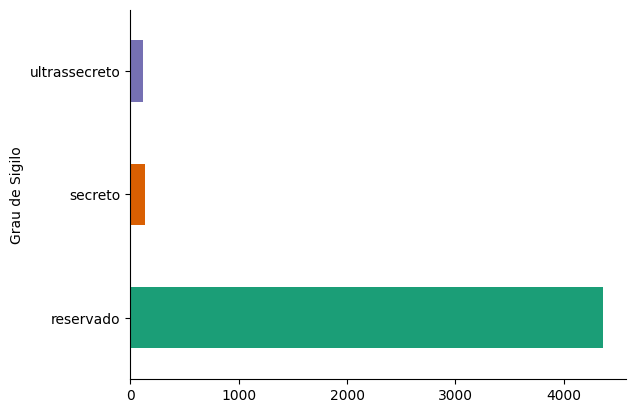

In [65]:
# @title Grau de Sigilo

%pip install seaborn

from matplotlib import pyplot as plt
import seaborn as sns
dataset_final.groupby('Grau de Sigilo').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [66]:
dataset_final.to_csv("arquivo.csv", index=False)

In [67]:
# 1. Número de colunas
num_colunas = dataset_final.shape[1]
print(f"Número de colunas: {num_colunas}")

# 2. Verificar valores nulos
valores_nulos = dataset_final.isnull().sum()
print("Valores nulos por coluna:")
print(valores_nulos)



Número de colunas: 5
Valores nulos por coluna:
Categoria               1
Dispositivo Legal       6
Grau de Sigilo          1
Tipo de Assunto        45
Assunto              4255
dtype: int64


In [68]:
dataset_final['Assunto'] = dataset_final['Assunto'].fillna(dataset_final['Assunto'].mode()[0])
dataset_final['Tipo de Assunto'] = dataset_final['Tipo de Assunto'].fillna(dataset_final['Tipo de Assunto'].mode()[0])
dataset_final['Grau de Sigilo'] = dataset_final['Grau de Sigilo'].fillna(dataset_final['Grau de Sigilo'].mode()[0])
dataset_final['Dispositivo Legal'] = dataset_final['Dispositivo Legal'].fillna(dataset_final['Dispositivo Legal'].mode()[0])
dataset_final['Categoria'] = dataset_final['Categoria'].fillna(dataset_final['Categoria'].mode()[0])


In [69]:
dataset_final

,Categoria,Dispositivo Legal,Grau de Sigilo,Tipo de Assunto,Assunto
0,Defesa e Segurança,III,secreto,Saúde Pública,Processo Administrativo contendo Termo de Comp...
1,Defesa e Segurança,VIII,secreto,Inteligência e Investigação,Processo Administrativo contendo Termo de Comp...
2,Defesa e Segurança,VIII,secreto,Inteligência e Investigação,Processo Administrativo contendo Termo de Comp...
3,Defesa e Segurança,VIII,secreto,Inteligência e Investigação,Processo Administrativo contendo Termo de Comp...
4,Defesa e Segurança,VIII,secreto,Inteligência e Investigação,Processo Administrativo contendo Termo de Comp...
...,...,...,...,...,...
4602,Economia e Finanças,V,reservado,Forças Armadas,Cálculos (10163787 e 10169912) e modelos (1016...
4603,Economia e Finanças,IV,reservado,Estabilidade Financeira,Nota Técnica
4604,Economia e Finanças,V,reservado,Forças Armadas,"Nota Técnica ""Impactos Iniciais da Introdução ..."
4605,Economia e Finanças,V,reservado,Forças Armadas,"Nota Técnica ""Impactos redistributivos da CBS:..."


In [70]:
# 1. Número de colunas
num_colunas = dataset_final.shape[1]
print(f"Número de colunas: {num_colunas}")

# 2. Verificar valores nulos
valores_nulos = dataset_final.isnull().sum()
print("Valores nulos por coluna:")
print(valores_nulos)

Número de colunas: 5
Valores nulos por coluna:
Categoria            0
Dispositivo Legal    0
Grau de Sigilo       0
Tipo de Assunto      0
Assunto              0
dtype: int64


In [71]:
dataset_final

,Categoria,Dispositivo Legal,Grau de Sigilo,Tipo de Assunto,Assunto
0,Defesa e Segurança,III,secreto,Saúde Pública,Processo Administrativo contendo Termo de Comp...
1,Defesa e Segurança,VIII,secreto,Inteligência e Investigação,Processo Administrativo contendo Termo de Comp...
2,Defesa e Segurança,VIII,secreto,Inteligência e Investigação,Processo Administrativo contendo Termo de Comp...
3,Defesa e Segurança,VIII,secreto,Inteligência e Investigação,Processo Administrativo contendo Termo de Comp...
4,Defesa e Segurança,VIII,secreto,Inteligência e Investigação,Processo Administrativo contendo Termo de Comp...
...,...,...,...,...,...
4602,Economia e Finanças,V,reservado,Forças Armadas,Cálculos (10163787 e 10169912) e modelos (1016...
4603,Economia e Finanças,IV,reservado,Estabilidade Financeira,Nota Técnica
4604,Economia e Finanças,V,reservado,Forças Armadas,"Nota Técnica ""Impactos Iniciais da Introdução ..."
4605,Economia e Finanças,V,reservado,Forças Armadas,"Nota Técnica ""Impactos redistributivos da CBS:..."


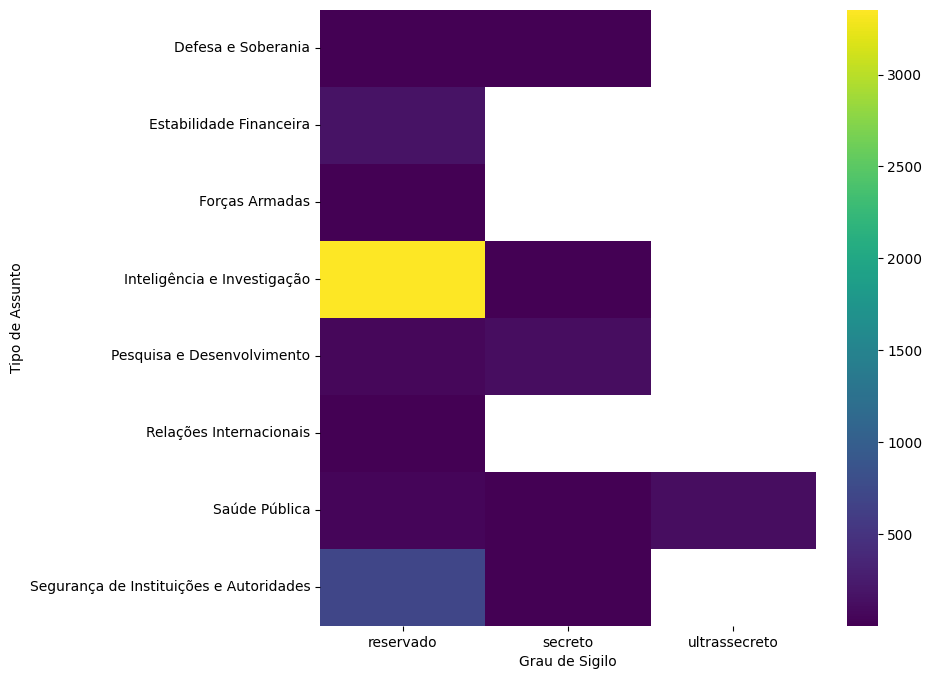

In [72]:
# @title Grau de Sigilo vs Tipo de Assunto

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Tipo de Assunto'].value_counts()
    for x_label, grp in dataset_final.groupby('Grau de Sigilo')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Grau de Sigilo')
_ = plt.ylabel('Tipo de Assunto')

In [73]:

dataset_final['Categoria'] = dataset_final['Categoria'].str.strip()
dataset_final['Categoria'] = dataset_final['Categoria'].str.replace(r'^\d+\s*-\s*', '', regex=True)


In [74]:
dataset_final

,Categoria,Dispositivo Legal,Grau de Sigilo,Tipo de Assunto,Assunto
0,Defesa e Segurança,III,secreto,Saúde Pública,Processo Administrativo contendo Termo de Comp...
1,Defesa e Segurança,VIII,secreto,Inteligência e Investigação,Processo Administrativo contendo Termo de Comp...
2,Defesa e Segurança,VIII,secreto,Inteligência e Investigação,Processo Administrativo contendo Termo de Comp...
3,Defesa e Segurança,VIII,secreto,Inteligência e Investigação,Processo Administrativo contendo Termo de Comp...
4,Defesa e Segurança,VIII,secreto,Inteligência e Investigação,Processo Administrativo contendo Termo de Comp...
...,...,...,...,...,...
4602,Economia e Finanças,V,reservado,Forças Armadas,Cálculos (10163787 e 10169912) e modelos (1016...
4603,Economia e Finanças,IV,reservado,Estabilidade Financeira,Nota Técnica
4604,Economia e Finanças,V,reservado,Forças Armadas,"Nota Técnica ""Impactos Iniciais da Introdução ..."
4605,Economia e Finanças,V,reservado,Forças Armadas,"Nota Técnica ""Impactos redistributivos da CBS:..."


In [ ]:
# prompt: gere uma tabela com o tipo de cada coluna no dataset_final e uma breve explicação de cada uma

import pandas as pd

# Assuming 'dataset_final' is already created as in your provided code.

def generate_table(df):
    """Generates a table with column types and descriptions."""

    table_data = []
    for col in df.columns:
        col_type = df[col].dtype
        description = ""

        if col == "Categoria":
            description = "Categoria temática do documento."
        elif col == "Dispositivo Legal":
            description = "Dispositivo legal que fundamenta a classificação do documento (Inciso do artigo 23 da LAI)."
        elif col == "Grau de Sigilo":
            description = "Nível de sigilo do documento (reservado, secreto, ultrassecreto)."
        elif col == "Tipo de Assunto":
            description = "Tipo de assunto relacionado ao dispositivo legal, de acordo com a LAI."
        elif col == "Assunto":
            description = "Breve resumo do assunto do documento."
        else:
            description = "Descrição não disponível."  # Default if no specific description

        table_data.append([col, col_type, description])

    table_df = pd.DataFrame(table_data, columns=["Coluna", "Tipo de Dado", "Descrição"])
    return table_df

table = generate_table(dataset_final)
table 

,Coluna,Tipo de Dado,Descrição
0,Categoria,object,Categoria temática do documento.
1,Dispositivo Legal,object,Dispositivo legal que fundamenta a classificaç...
2,Grau de Sigilo,object,"Nível de sigilo do documento (reservado, secre..."
3,Tipo de Assunto,object,Tipo de assunto relacionado ao dispositivo leg...
4,Assunto,object,Breve resumo do assunto do documento.


/var/folders/st/g98hnzxj3v7bl991fd47rplm0000gn/T/ipykernel_60606/2182705641.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Categoria', data=dataset_final, order=dataset_final['Categoria'].value_counts().index, palette='viridis')


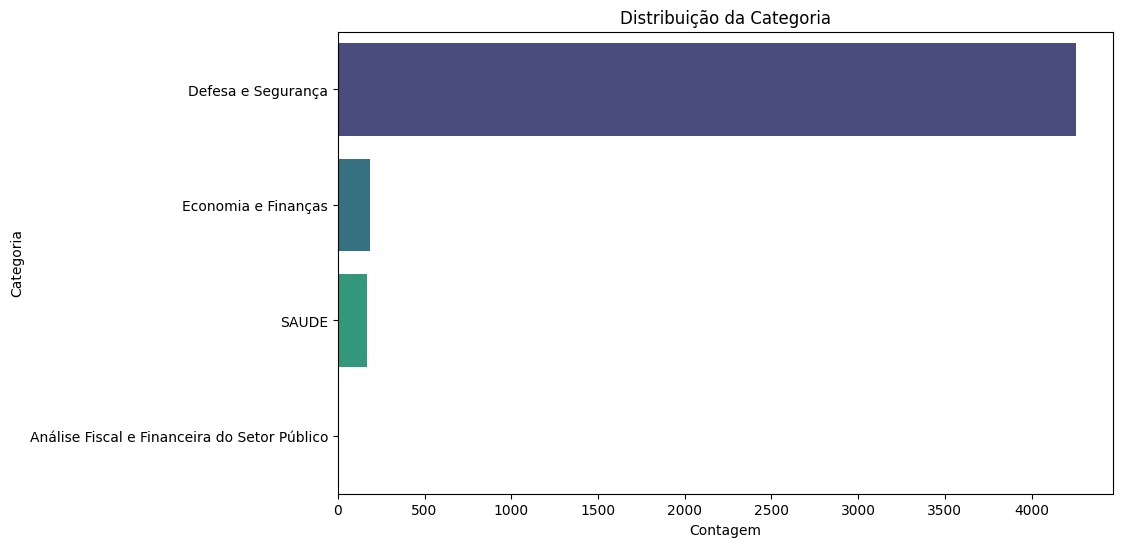

In [79]:
import seaborn as sns

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(y='Categoria', data=dataset_final, order=dataset_final['Categoria'].value_counts().index, palette='viridis')
plt.title('Distribuição da Categoria')
plt.xlabel('Contagem')
plt.ylabel('Categoria')
plt.show()

In [76]:
dataset_final['Categoria'].unique()


array(['Defesa e Segurança', 'SAUDE', 'Economia e Finanças',
       '06 – Economia e Finanças',
       'Análise Fiscal e Financeira do Setor Público'], dtype=object)

In [77]:
dataset_final['Categoria'] = dataset_final['Categoria'].str.replace(r'^\d+\s*–\s*', '', regex=True)

In [78]:
dataset_final.to_csv("dataset_tcc.csv", index=False)